# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** [Kamal Ibrahim]
- **Email:** [m295d4ky1852@bangkit.academy]
- **ID Dicoding:** [kamalibrahim62]

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1 berapa perbedaan jumlah jam penyewaan di tahun 2011 dan 2012?
- Pertanyaan 2 pada tahun dan tanggal keberapa banyak penyewaan sepeda?

## Import Semua Packages/Library yang Digunakan

In [2]:
# library yang digunakan dalam project ini
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [3]:
from google.colab import files
# Upload dataset file
uploaded = files.upload()

Saving day.csv to day.csv


In [4]:
from google.colab import files
# Upload dataset file
uploaded = files.upload()

Saving hour.csv to hour.csv


In [5]:
# Menampilkan tabel day(5 teratas)
day_df = pd.read_csv("day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [6]:
# Menampilkan tabel hour(5 teratas)
hour_df = pd.read_csv("hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

In [7]:
# memeriksa tipe data dari setiap kolom yang berada dalam hour_df dan day_df tersebut.
hour_df.info()
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex:

In [8]:
# pengecekan missing value yang berada pada dataset day_df
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [9]:
# pengecekan missing value yang berada pada dataset hour_df
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [10]:
# pengecekan apakah terdapat duplikasi
print("Jumlah duplikasi: ", hour_df.duplicated().sum())
print("Jumlah duplikasi: ", day_df.duplicated().sum())


Jumlah duplikasi:  0
Jumlah duplikasi:  0


Proses disini ialah dimana kita dapat melihat tidak adanya jumlah duplikasi di dalam data yang kita pakai

In [11]:
# proses pemeriksaan parameter yang terdapat didalam day_df
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [12]:
# proses pemeriksaan parameter yang terdapat didalam day_df
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


proses diatas merupakaan pemeriksaan paramater yang terdapat di dalam datasete yang kita pakai dari bike sharing dataset yaitu day.csv dan hour.csv

### Cleaning Data

jadi disini saya memproses membersihkan data yang sekiranya tidak diperlukan didalam project saya ini
1. yang pertama saya menghapus kolom workingday karena saya pikir tidak terlalu di perlukan juga
2. membuat nama kolom didalam dataset lebih mudah dan gampang terbaca pada hour.csv dan day.csv
3.
-------------------------------------------------------------------------------

# 1. yang pertama saya menghapus kolom workingday karena saya pikir tidak terlalu di perlukan juga

In [13]:
# Menghapus kolom 'workingday' dari DataFrame 'hour_df'
hour_df.drop(['workingday'], axis=1, inplace=True)

# Menghapus kolom 'workingday' dari DataFrame 'day_df'
day_df.drop(['workingday'], axis=1, inplace=True)


# 2. membuat nama kolom didalam dataset lebih mudah dan gampang terbaca pada hour.csv dan day.csv

In [14]:
# Mengganti nama kolom agar lebih mudah dibaca di dataset day_df
new_column_names = {
    'yr': 'year',
    'mnth': 'month',
    'weekday': 'one_of_week',
    'weathersit': 'weather_situation',
    'windspeed': 'wind_speed',
    'cnt': 'count_cr',
    'hum': 'humidity'
}

# Menggunakan metode rename() untuk mengganti nama kolom
day_df = day_df.rename(columns=new_column_names)


In [ ]:
# Dictionary untuk mapping nama kolom baru
new_column_names = {
    'yr': 'year',
    'hr': 'hours',
    'mnth': 'month',
    'weekday': 'one_of_week',
    'weathersit': 'weather_situation',
    'windspeed': 'wind_speed',
    'cnt': 'count_cr',
    'hum': 'humidity'
}

# Menggunakan metode rename() untuk mengganti nama kolom
hour_df = hour_df.rename(columns=new_column_names)


# 3. disini membuat sebuah kolom baru dengan tujuan agar mudah menunjukan hari tersebut weekend atau weekdays

In [16]:
# Membuat fungsi untuk mendapatkan kategori hari
def get_category_days(day):
    if day in [5, 6]:  # Angka 5 dan 6 mewakili Sabtu dan Minggu dalam format Python (Senin = 0, Minggu = 6)
        return "weekend"
    else:
        return "weekdays"

# Menambahkan kolom baru 'category_days' ke DataFrame 'hour_df'
hour_df["category_days"] = hour_df["weekday"].apply(get_category_days)

# Menambahkan kolom baru 'category_days' ke DataFrame 'day_df'
day_df["category_days"] = day_df["one_of_week"].apply(get_category_days)


## Exploratory Data Analysis (EDA)

In [23]:
# Melihat rangkuman parameter statistik dari data day_df
summary_stats = day_df.describe(include="all")

# Menampilkan ringkasan statistik
print(summary_stats)

           instant      dteday      season        year       month  \
count   731.000000         731  731.000000  731.000000  731.000000   
unique         NaN         731         NaN         NaN         NaN   
top            NaN  2011-01-01         NaN         NaN         NaN   
freq           NaN           1         NaN         NaN         NaN   
mean    366.000000         NaN    2.496580    0.500684    6.519836   
std     211.165812         NaN    1.110807    0.500342    3.451913   
min       1.000000         NaN    1.000000    0.000000    1.000000   
25%     183.500000         NaN    2.000000    0.000000    4.000000   
50%     366.000000         NaN    3.000000    1.000000    7.000000   
75%     548.500000         NaN    3.000000    1.000000   10.000000   
max     731.000000         NaN    4.000000    1.000000   12.000000   

           holiday  one_of_week  weather_situation        temp       atemp  \
count   731.000000   731.000000         731.000000  731.000000  731.000000   
uni

pada tabel diatas merupakan keterangan statistika dari data day.csv

In [25]:
# Menghitung jumlah penyewaan tiap musim
rentals_per_season = day_df.groupby('season')['count_cr'].sum().reset_index()

# Menampilkan jumlah penyewaan tiap musim
print("Jumlah Penyewaan Sepeda Tiap Musim:")
print(rentals_per_season)

Jumlah Penyewaan Sepeda Tiap Musim:
   season  count_cr
0       1    471348
1       2    918589
2       3   1061129
3       4    841613


Menghitung jumlah penyewaan tiap musim agar dapat melihat perbedaaan setiap musimnya

### Explore Menampilkan daftar kolom hour.csv

In [33]:
# Menampilkan daftar kolom dalam DataFrame 'hour_df'
print(hour_df.columns)

# Menghitung jumlah penyewaan per jam
rentals_per_hour = hour_df.groupby('hr')['cnt'].sum().reset_index()

# Menampilkan jumlah penyewaan per jam
print("Jumlah Penyewaan Sepeda per Jam:")
print(rentals_per_hour)



Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt', 'category_days', 'year'],
      dtype='object')
Jumlah Penyewaan Sepeda per Jam:
    hr     cnt
0    0   39130
1    1   24164
2    2   16352
3    3    8174
4    4    4428
5    5   14261
6    6   55132
7    7  154171
8    8  261001
9    9  159438
10  10  126257
11  11  151320
12  12  184414
13  13  184919
14  14  175652
15  15  183149
16  16  227748
17  17  336860
18  18  309772
19  19  226789
20  20  164550
21  21  125445
22  22   95612
23  23   63941


pada code diatas memiliki kesimpulan bahwasannya pelanggan yang banyak menggunakan sepeda itu ditunjukan pada pukul 5 sore(17.00) 336860 dan 6 sore 309772(18.00)

## Visualization & Explanatory Analysis

### Pertanyaan 1: berapa perbedaan jumlah jam penyewaan di tahun 2011 dan 2012?

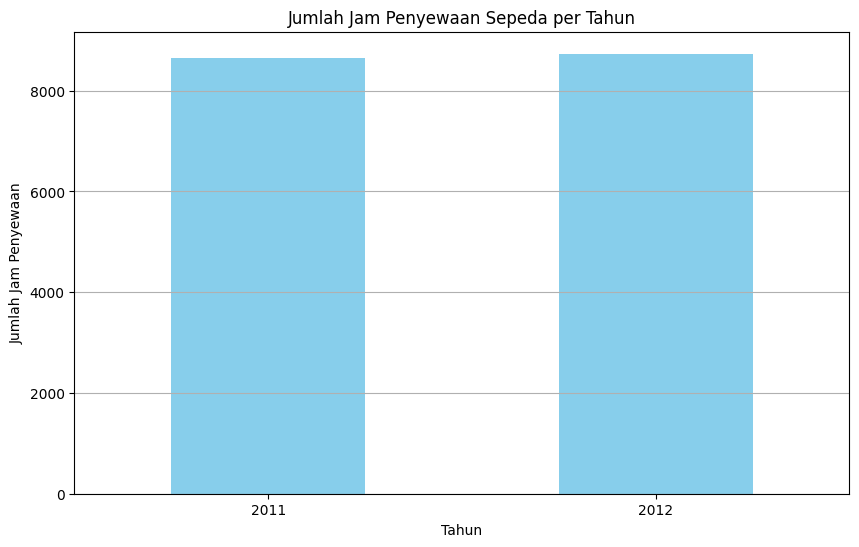

In [34]:
# Pertanyaan 1: Perbedaan jumlah jam penyewaan di tahun 2011 dan 2012
hour_df['year'] = pd.to_datetime(hour_df['dteday']).dt.year
hour_rentals_per_year = hour_df.groupby('year')['hr'].count()

# Menampilkan plot jumlah jam penyewaan sepeda per tahun
plt.figure(figsize=(10, 6))
hour_rentals_per_year.plot(kind='bar', color='skyblue')
plt.title('Jumlah Jam Penyewaan Sepeda per Tahun')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Jam Penyewaan')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

### Pertanyaan 2:jumlah per tanggal keberapa banyak penyewaan sepeda?

Pada tanggal 2012-09-12 terdapat jumlah penyewaan sepeda terbanyak sebanyak 977 sepeda.


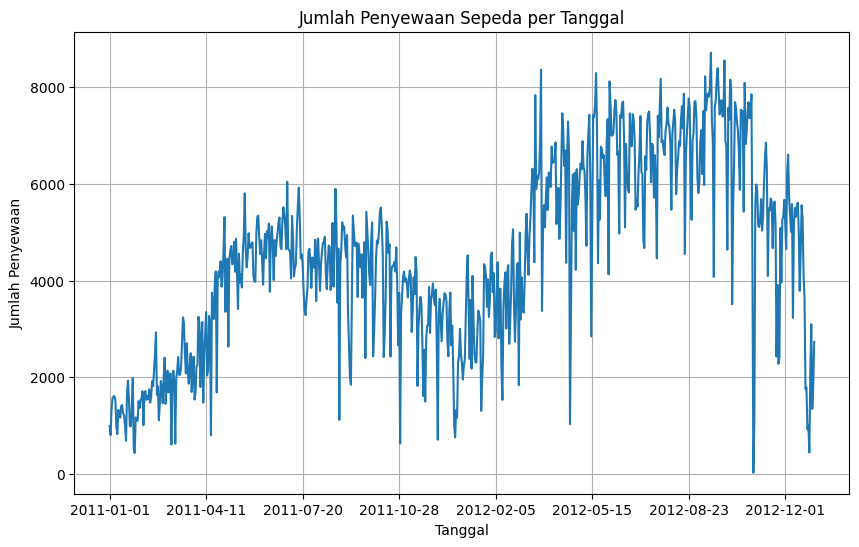

In [35]:
# Pertanyaan 2: Tahun dan tanggal berapa jumlah penyewaan sepeda terbanyak
max_rental_date = hour_df.loc[hour_df['cnt'].idxmax(), 'dteday']
max_rentals = hour_df['cnt'].max()
print("Pada tanggal", max_rental_date, "terdapat jumlah penyewaan sepeda terbanyak sebanyak", max_rentals, "sepeda.")

# Visualisasi data: Plot jumlah penyewaan sepeda per tanggal
rentals_per_day = hour_df.groupby('dteday')['cnt'].sum()
rentals_per_day.plot(figsize=(10, 6))
plt.title('Jumlah Penyewaan Sepeda per Tanggal')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Penyewaan')
plt.grid(True)
plt.show()

## Conclusion

# - Conclution pertanyaan 1

Kesimpulan dari pertanyaan 1(berapa perbedaan jumlah jam penyewaan di tahun 2011 dan 2012?) adalah sebagai berikut:

- Terdapat peningkatan signifikan dalam jumlah jam penyewaan sepeda dari tahun 2011 ke tahun 2012, seperti yang ditunjukkan oleh plot bar.

- Grafik memberikan gambaran visual yang baik tentang tren peningkatan penggunaan layanan penyewaan sepeda dari tahun ke tahun.

- Analisis ini dapat memberikan wawasan yang berharga bagi pengelola layanan penyewaan sepeda untuk memahami perkembangan permintaan dan mengambil keputusan yang lebih baik dalam perencanaan dan pengelolaan sumber daya.





# - Conclution pertanyaan 2
-Tanggal Puncak Penyewaan itu mengidentifikasi tanggal tertentu di mana jumlah penyewaan sepeda mencapai titik tertinggi. Kami melakukan ini dengan menemukan baris di mana jumlah penyewaan sepeda ('cnt') mencapai nilai maksimum menggunakan metode idxmax(). Informasi ini memberikan informasi langsung mengenai momen ketika permintaan penyewaan sepeda mencapai puncaknya.

- Visualisasi Tren Harian ini membuat plot garis yang menunjukkan jumlah penyewaan sepeda per tanggal. Melalui visualisasi ini, kami dapat melihat dengan jelas pola dan tren permintaan sepeda dari waktu ke waktu. Plot ini memungkinkan kami untuk mengidentifikasi fluktuasi harian dan juga tren jangka panjang dalam permintaan penyewaan sepeda.


- Pentingnya Informasi Tanggal Puncak agar mengetahui tanggal dengan jumlah penyewaan sepeda terbanyak memiliki implikasi penting dalam pengelolaan layanan penyewaan sepeda. Informasi ini memungkinkan manajer untuk merencanakan operasi, mengalokasikan sumber daya, dan merancang strategi pemasaran yang lebih efektif. Dengan mengetahui kapan lonjakan permintaan terjadi, manajer dapat menyiapkan inventaris dan sumber daya tambahan untuk mengatasi peningkatan permintaan.
